# グラフ理論

2つの構造の近さや同一性は、幾何学的な形で(=座標で)直接比較するよりも、つながり方(=ネットワークトポロジー)で表現したほうがわかりやすい場合がある。化学の分子式はつながり方の表現方法であり、ネットワークでの表現に向いている。

また、幾何学情報が実数の情報であるのに対し、ネットワークの情報は整数である。整数であれば、同一か否かの判定が容易で、誤差を生じない。また計算機のアーキテクチャにも非常によくなじむ。

グラフ理論はEulerによる一筆描きの考察から生まれたと言われている。

![](https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/7_bridges.svg/200px-7_bridges.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Königsberg_graph.svg/200px-Königsberg_graph.svg.png)

> Königsbergの7つの橋の問題「このプレーゲル川に架かっている7つの橋を2度通らずに、全て渡って、元の所に帰ってくることができるか。ただし、どこから出発してもよい。」(Wikipedia: Seven Bridges of Königsberg)

この問題は、橋の位置や川の流れ方といった、空間情報(幾何情報)がなくても、陸地と陸地の間の隣接関係(トポロジー情報)だけで答えをみつけることができる。

『「つながり方」に着目して抽象化された「点(頂点)とそれをむすぶ線(辺)」の概念がグラフであり、グラフが持つ様々な性質を探求するのがグラフ理論である。』(Wikipedia: グラフ理論)

ひと筆書き、あみだくじなど、グラフの性質(トポロジー)を使った遊びは多数ある。

## グラフ理論の基礎

辺$e$は必ず2つの頂点を結ぶ。以下 $e(i,j)$ あるいは $e(i\rightarrow j)$ と表記する。一方、1つの頂点$v$には0本以上の辺が連結する。1つの頂点に連結する辺の本数を、頂点の**次数**と呼び$d(v)$で表わす。有向グラフの場合には、**入次数**と**出次数**の区別がある。次数0の頂点を**孤立点**と呼ぶ。

1つの頂点につながる辺は互いに**隣接**しているという。1つの辺の両端の頂点は互いに**隣接**していると言う(?)

辺には矢印を描く場合と描かない場合がある。辺が矢印である(辺が方向性を持つ、有向辺)グラフを有向グラフ、すべての辺が矢印でない(無向辺)グラフを**無向グラフ**と呼ぶ。有向グラフは双六を想像すると良い。それぞれのコマから進める方向は決まっていて、逆行は許されない。通常、ひとつのグラフで有向辺と無向辺を混在して使うことはない。また、無向グラフの辺$e(i,j)$を2本の有向辺$e(i\rightarrow j)$と$e(j\rightarrow i)$に置きかえて、等価な有向グラフを作ることができる。 道路は一方通行があるので、有向グラフで表現される。日本の鉄道路線はほぼ無向グラフで表わせるが、わずかに例外がある。

それぞれの辺に**重み**(コスト)を付与することがある。重みが付いているグラフを**重み付きグラフ**と呼ぶ。重み付きグラフは、反応流束を計算したり、物資の輸送容量を計算する場合に多用する。頂点にも重みを与えることがある。

頂点iから頂点jまで 隣接する辺をつたって (有向グラフの場合は辺の向きに沿って) たどりつける場合、その頂点と辺の系列を**歩道** *walk*(**鎖** *chain*)と呼ぶ。そのうち、すべての辺が異なるものを**路** *trail*(**経路**)と呼ぶ。さらに、すべての頂点が異なるものを**パス** *path*(**経路**)、始点と終点が同じ頂点であるパスを**循環** *cycle*(**巡回路**、**環路**)と呼ぶ。

2頂点間の最短経路における辺数を**距離** *distance*と呼ぶ。 グラフの最大頂点間距離を**直径** *diameter*と呼ぶ。

頂点 $i$ と $i$ をつなぐ(つまり出発点に戻ってくる)辺を**ループ** *loop*と呼ぶ。

頂点 $i$ から $j$ への辺が複数ある場合、それらを**多重辺**と呼ぶ。

ループも多重辺も持たないグラフを**単純グラフ**と呼ぶ。

無向グラフが**連結**であるとは、グラフの任意の2つの頂点の間をつなぐ経路が存在することを言う。非連結なグラフは孤立した2つ以上の連結なグラフの集まりである。(有向グラフの場合には、連結であっても、任意の頂点から頂点に行けるとは限らない)

どの頂点も次数が同じグラフのことを**正則グラフ**と呼ぶ。また、すべての異なる頂点対の間に辺がある正則グラフのことを**完全グラフ**と呼ぶ。立方体グラフは3-正則グラフ(すべての頂点が次数3のグラフ)、四面体グラフは完全グラフ$K_4$である。

頂点のうち $n$ 個を白、残りの $m$ 個を黒で塗りわけた時に、白同士、黒同士を結ぶ辺を持たないグラフを**二部グラフ**と呼ぶ。すべての白と黒の組みあわせの間に辺を持つグラフを**完全二部グラフ** $K_{n,m}$と呼ぶ。

![K3,3](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Complete_bipartite_graph_K3%2C3.svg/200px-Complete_bipartite_graph_K3%2C3.svg.png)
![K5](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Complete_Graph_K5_with_labels.svg/200px-Complete_Graph_K5_with_labels.svg.png)
![Cube graph](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Graph_isomorphism_b.svg/200px-Graph_isomorphism_b.svg.png)
![Tetrahedral graph K4](https://upload.wikimedia.org/wikipedia/commons/1/1f/Graphe_complet_K4.png)

> 典型的なグラフの例: 左から完全2部グラフ$K_{3,3}$、完全グラフ$K_5$, 立方体グラフ、四面体グラフ$K_4$。なお、グラフを平面に描く時には、辺を自由に曲げても構わない。

**部分グラフ**：グラフ$G$から、頂点と辺を抜きだして作ったグラフ

**真部分グラフ**: 部分グラフのうち、$G$そのもの以外。

**n連結グラフ**: $n$個の頂点をうまく選んで取り除くと分割されてしまう($n$頂点切断)ようなグラフ。

2つのグラフ$G$と$G’$が同じ個数の頂点を持ち、同一の辺のつながりかたをしている(グラフ$G$の頂点のラベルを書き換えることで、グラフ$G’$に完全に重ねることができる)時、それらは**同型** *isomorphic*であるという。

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Graph_isomorphism_a.svg/200px-Graph_isomorphism_a.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Graph_isomorphism_b.svg/200px-Graph_isomorphism_b.svg.png)

> 同型グラフの例。

## NetworkX

ネットワークをPythonで扱うのは、他の言語を使う場合に比べてかなり容易だが、グラフ理論のライブラリNetworkXを利用すると、さらに簡単になる。

NetworkXで、以下のグラフを扱ってみよう。

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Graph_isomorphism_b.svg/200px-Graph_isomorphism_b.svg.png)

`Graph()`は無向グラフを生成する。

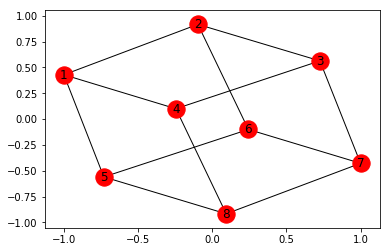

In [15]:
%matplotlib inline
import networkx as nx

g = nx.Graph([[1,2],[2,3],[3,4],[4,1],[1,5],[5,6],[6,2],[6,7],[7,3],[7,8],[8,4],[8,5]])
nx.draw_networkx(g, with_labels=True)

もう一方のグラフも作ってみよう。

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Graph_isomorphism_a.svg/200px-Graph_isomorphism_a.svg.png)

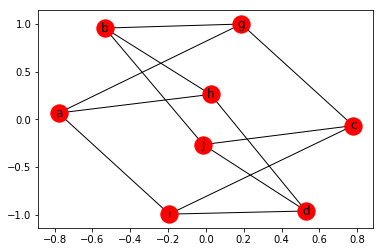

In [16]:
%matplotlib inline
import networkx as nx

h = nx.Graph([["a","g"],["b","h"],["c","i"],["d","j"],["a","h"],["a","i"],
              ["b","g"],["b","j"],["c","g"],["c","j"],["d","h"],["d","i"]])
nx.draw_networkx(h, with_labels=True)

これらは同型グラフですよね?

In [17]:
nx.is_isomorphic(g,h)

True

同型性をチェックするプログラムは自分で書けないこともないが、かなり面倒で、慎重なチェックが必要なので、NetworkXを使ったほうが良い。なお、厳密な同型性チェックに要する時間は、頂点の数の指数に比例するため、グラフが大きくなるとかなり難しくなる。NetworkXには、近似的かつ高速に同型性をチェックするいくつかのアルゴリズムもある。

### 距離

グラフ`h`の頂点`a`と`c`の最短経路は

In [22]:
nx.shortest_path(h,"a","c")

['a', 'i', 'c']

In [23]:
nx.shortest_path_length(h,"a","c")

2

In [24]:
nx.has_path(h,"a","c")

True

直径とは、グラフのなかの最長路の長さのこと。

In [25]:
nx.diameter(h)

3

> ルービックキューブのすべてのとりうる状態(43252003274489856000通り、4325京通り)をグラフの頂点とし、一回の操作でたどりつける状態を辺で結んだグラフを考える。任意の状態から、完全状態(すべての面がそろった状態)に戻すのに最低何回操作する必要があるか、という問題は、このグラフの直径を求める問題である。Googleは2010年に直径が20であることを証明した。 https://www.cube20.org

すべての頂点の間の距離を、行列のかたちで欲しい場合もある。

https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.html?highlight=distance%20matrix をじっくり読んで、紹介すべきものをさぐる。実際的な用途を紹介する。宿題を決める。